# K - Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2 cluster Step by Step

### Linear Data

In [2]:
x = np.random.rand(200)
y = (2 * x) + np.random.rand(200)
y = y / 3
data = np.stack((x,y), axis=1)

### Initial

In [3]:
K = 2

### Random  2 centrol

In [4]:
idx = np.random.choice(data.shape[0], K, replace=False)
k_pos = data[idx]

### Plot the centers

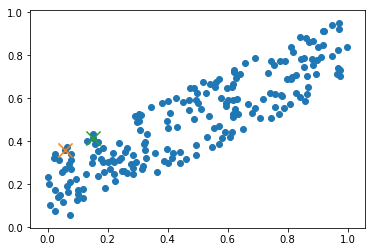

In [5]:
plt.scatter(x,y)
for k in range(K):
    plt.scatter(k_pos[k,0], k_pos[k,1],200,marker='x',)

### Compute Distance

In [6]:
distance = [np.linalg.norm(data - k, axis=1) for k in k_pos]
distance = np.stack(distance,axis=1)
cluster = np.argmin(distance,axis=1)

### plot

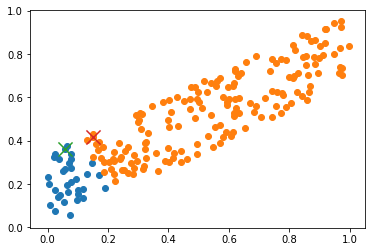

In [7]:
plt.scatter(x[cluster==0],y[cluster==0])
plt.scatter(x[cluster==1],y[cluster==1])
for k in range(K):
    plt.scatter(k_pos[k,0], k_pos[k,1],200,marker='x',)

### Update Center

In [8]:
k_pos[0] = np.mean(x[cluster==0]), np.mean(y[cluster==0])
k_pos[1] = np.mean(x[cluster==1]), np.mean(y[cluster==1])

### Compute new distance

In [9]:
distance = [np.linalg.norm(data - k, axis=1) for k in k_pos]
distance = np.stack(distance,axis=1)
cluster = np.argmin(distance,axis=1)

### Plot New

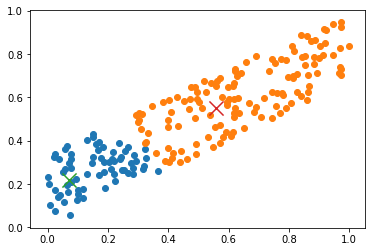

In [10]:
plt.scatter(x[cluster==0],y[cluster==0])
plt.scatter(x[cluster==1],y[cluster==1])
for k in range(K):
    plt.scatter(k_pos[k,0], k_pos[k,1],200,marker='x',)

### Repeat until converg

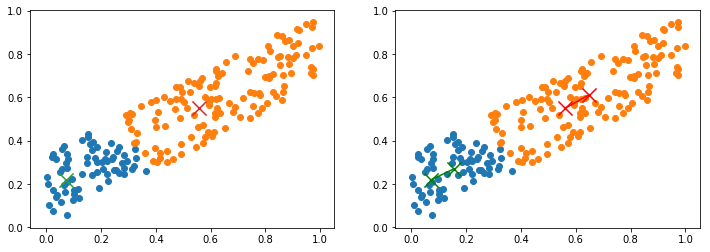

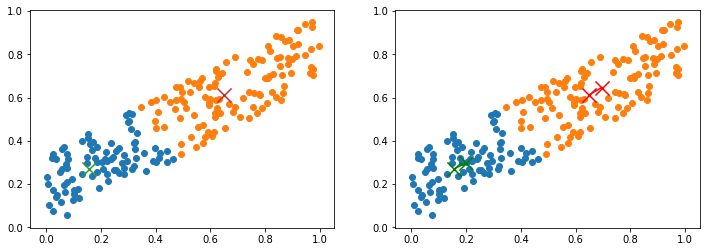

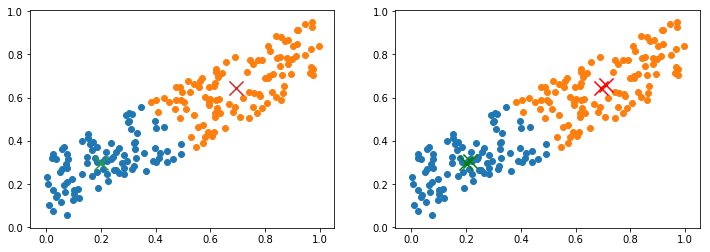

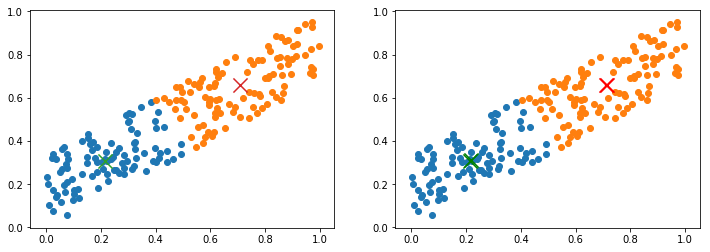

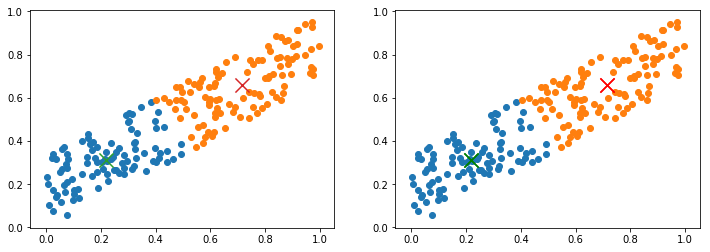

In [11]:
c = ['g','r']
_cluster = None
while True:
    
    distance = [np.linalg.norm(data - k, axis=1) for k in k_pos]
    distance = np.stack(distance,axis=1)
    
    cluster = np.argmin(distance,axis=1)
    
    plt.figure(figsize=(12,4))
    plt.axis('equal')
    plt.subplot(1,2,1)
    plt.scatter(x[cluster==0],y[cluster==0])
    plt.scatter(x[cluster==1],y[cluster==1])
    for k in range(K):
        plt.scatter(k_pos[k,0], k_pos[k,1],200,marker='x',)
    # save old pos
    k_pos_old = k_pos.copy()
    
    k_pos[0] = np.mean(x[cluster==0]), np.mean(y[cluster==0])
    k_pos[1] = np.mean(x[cluster==1]), np.mean(y[cluster==1])
    
    plt.subplot(1,2,2)
    plt.scatter(x[cluster==0],y[cluster==0])
    plt.scatter(x[cluster==1],y[cluster==1])
    for k in range(K):
        dot = plt.scatter(k_pos_old[k,0], k_pos_old[k,1],200,marker='x',c = c[k])
        pos = np.stack((k_pos_old[k], k_pos[k]))
        plt.plot(pos[:,0], pos[:,1],c=c[k])
        dot = plt.scatter(k_pos[k,0], k_pos[k,1],200,marker='x',c = c[k])
    plt.show()
    if (_cluster == cluster).all() == False:
        _cluster = cluster
        continue
    else:
        break

## Multi-Classes

### Gaussian Data

In [5]:
data1 = np.random.randn(100,2)
data2 = np.random.randn(100,2) + 3
data = np.concatenate((data1,data2))

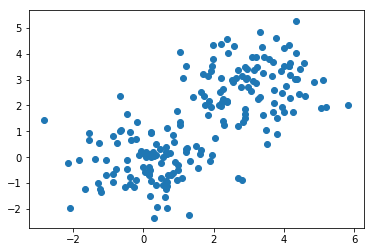

In [6]:
plt.scatter(data[:,0],data[:,1])

### Initial

In [7]:
K = 3
idx = np.random.choice(data.shape[0], K, replace=False)
k_pos = data[idx]

### Clustering

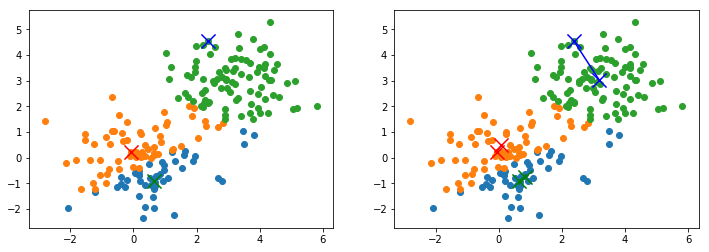

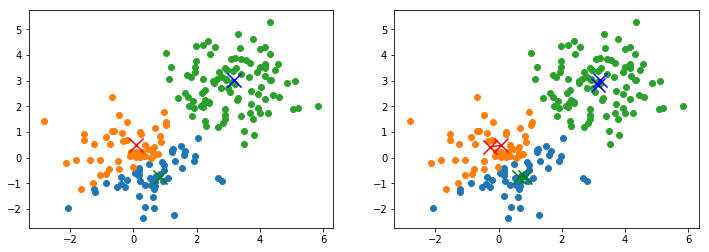

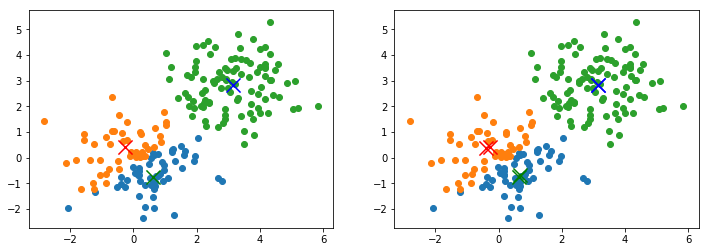

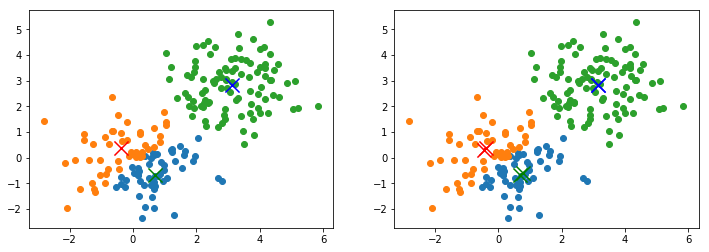

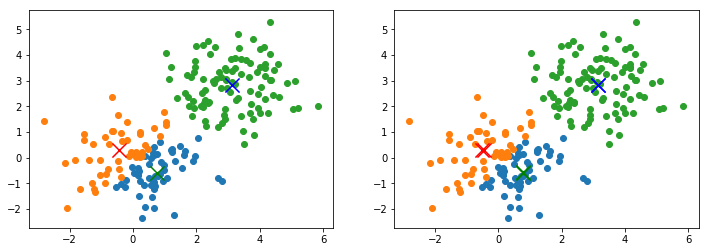

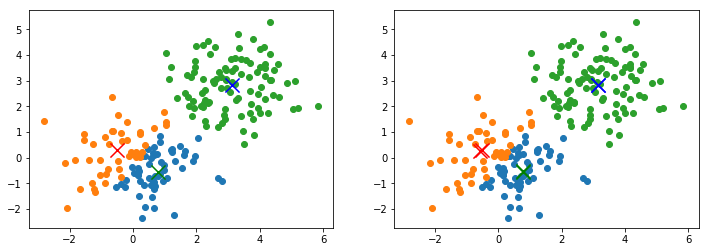

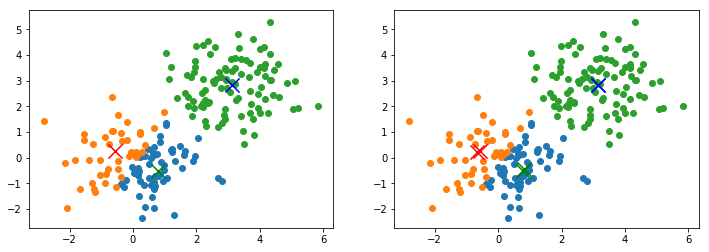

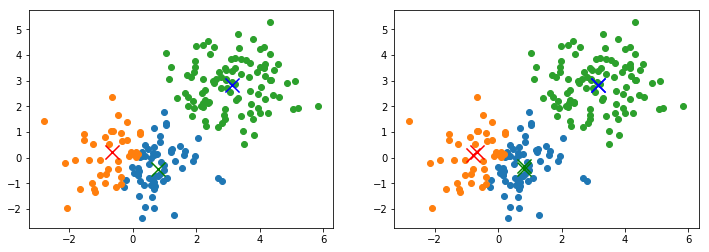

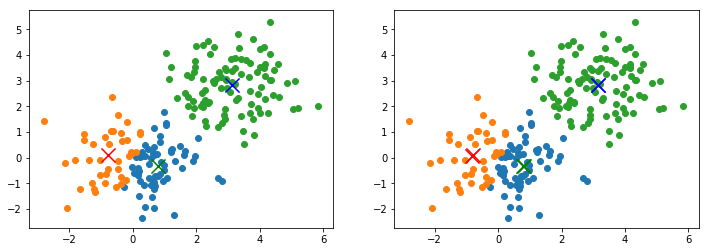

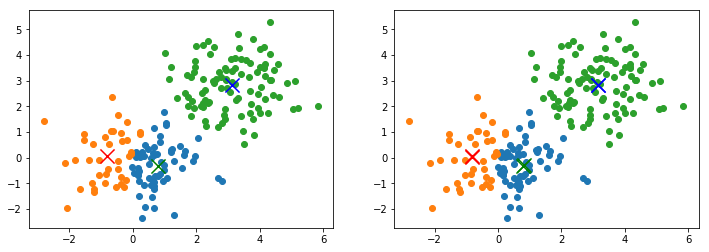

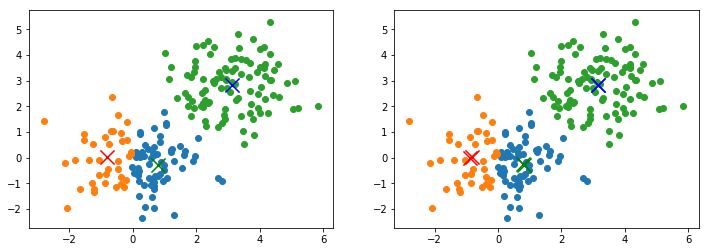

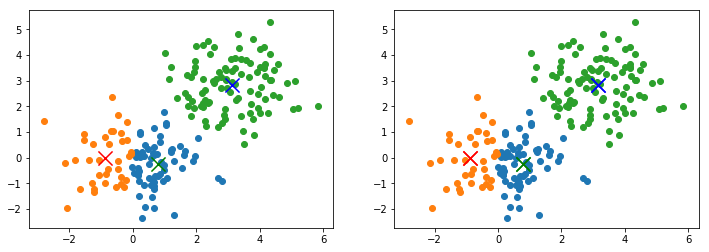

In [9]:
x = data[:,0]
y = data[:,1]
c = ['g','r','b']
_cluster = None
while True:
    
    distance = [np.linalg.norm(data - k, axis=1) for k in k_pos]
    distance = np.stack(distance,axis=1)
    
    cluster = np.argmin(distance,axis=1)
    
    plt.figure(figsize=(12,4), )
    plt.axis('equal')
    plt.subplot(1,2,1)
    plt.scatter(x[cluster==0],y[cluster==0])
    plt.scatter(x[cluster==1],y[cluster==1])
    plt.scatter(x[cluster==2],y[cluster==2])
    for k in range(K):
        plt.scatter(k_pos[k,0], k_pos[k,1],200,marker='x',c = c[k])
    # save old pos
    k_pos_old = k_pos.copy()
    
    k_pos[0] = np.mean(x[cluster==0]), np.mean(y[cluster==0])
    k_pos[1] = np.mean(x[cluster==1]), np.mean(y[cluster==1])
    k_pos[2] = np.mean(x[cluster==2]), np.mean(y[cluster==2])
    
    plt.subplot(1,2,2)
    plt.scatter(x[cluster==0],y[cluster==0])
    plt.scatter(x[cluster==1],y[cluster==1])
    plt.scatter(x[cluster==2],y[cluster==2])
    for k in range(K):
        dot = plt.scatter(k_pos_old[k,0], k_pos_old[k,1],200,marker='x',c = c[k])
        pos = np.stack((k_pos_old[k], k_pos[k]))
        plt.plot(pos[:,0], pos[:,1],c=c[k])
        dot = plt.scatter(k_pos[k,0], k_pos[k,1],200,marker='x',c = c[k])
    plt.show()
    if (_cluster == cluster).all() == False:
        _cluster = cluster
        continue
    else:
        break